In [2]:
import copy
import glob
import os
import time
import datetime
import csv
import matplotlib.pyplot as plt
from collections import deque

import gym
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from a2c_ppo_acktr import algo, utils
from a2c_ppo_acktr.arguments import get_args
from a2c_ppo_acktr.envs import make_vec_envs
from a2c_ppo_acktr.model import Policy, Bandit_Policy
from a2c_ppo_acktr.storage import RolloutStorage, SkipReplayBuffer
from evaluation import evaluate
from sb3_contrib import QRDQN, TQC, TRPO
from stable_baselines3 import A2C, DDPG, DQN, PPO, SAC, TD3

In [10]:
ALGOS = {
    "a2c": A2C,
    "ddpg": DDPG,
    "dqn": DQN,
    "ppo": PPO,
    "sac": SAC,
    "td3": TD3,
    # SB3 Contrib,
    "qrdqn": QRDQN,
    "tqc": TQC,
    "trpo": TRPO,
}

algo = "dqn"
env_id = "BreakoutNoFrameskip-v4"
seed = 1
num_processes = 1
device = "cpu"
eval_log_dir = "./"

model_path = os.path.join('./rl-trained-agents/' , algo, env_id+"_1", env_id+".zip") 
bandit_path = os.path.join('./experiments/' , env_id, "bdqn", "20220106T224832.135078", "trained_models" , env_id+".pt")
env = make_vec_envs(env_id, seed, num_processes, 0.99, eval_log_dir, device, False)
model = ALGOS[algo].load(model_path, env=env)


In [ ]:
model.replay_buffer.add
model.

In [14]:
bandit_net = torch.load(bandit_path, map_location=torch.device('cpu'))[1]
theta = torch.load(bandit_path, map_location=torch.device('cpu'))[2]

In [50]:
obs = env.reset()
deterministic = False # Deterministic by default except for atari games
state = None
episode_reward = 0.0
episode_rewards, episode_lengths = [], []
ep_len = 0
eval_episode_rewards = []

In [51]:
while len(eval_episode_rewards) < 1:
    action, state = model.predict(obs.numpy(), state=state, deterministic=deterministic)
    obs, reward, done, infos = env.step(torch.tensor([action]))
    
    episode_reward += reward[0]
    ep_len += 1

    for info in infos:
        if 'episode' in info.keys():
            eval_episode_rewards.append(info['episode']['r'])

    

In [52]:
print(" Evaluation using {} episodes: mean reward {:.5f}\n".format(
        len(eval_episode_rewards), np.mean(eval_episode_rewards)))

 Evaluation using 1 episodes: mean reward 375.00000



In [53]:
ep_len 


196

In [10]:
eval_episode_rewards = []
obs = env.reset()
eval_recurrent_hidden_states = torch.zeros(
    num_processes, model.recurrent_hidden_state_size, device=device)
eval_masks = torch.zeros(num_processes, 1, device=device)
i = 0
skip = 0
rep_count = 0
rep_l = []
old_action = 99
while len(eval_episode_rewards) < 1:
    i+=1


    
    if skip == 0:
        with torch.no_grad():
            _, action, _, eval_recurrent_hidden_states = model.act(
                obs,
                eval_recurrent_hidden_states,
                eval_masks,
                deterministic=True)
        old_action = action
        skip = 3
    else:
        action = old_action
        skip -= 1


    #print(i, action)
    # Obser reward and next obs
    obs, reward, done, infos = envs.step(action)

    eval_masks = torch.tensor(
        [[0.0] if done_ else [1.0] for done_ in done],
        dtype=torch.float32,
        device=device)
    #img_save_dir = img_dir + '{}.png'.format(i)
    #plt.imsave( img_save_dir , obs[0][0])
    
    for info in infos:
        if 'episode' in info.keys():
            eval_episode_rewards.append(info['episode']['r'])

envs.close()

AttributeError: 'DQN' object has no attribute 'recurrent_hidden_state_size'

In [43]:
env_name = "MsPacmanNoFrameskip-v4"
path = f"./experiments/{env_name}/a2c/a2c_2/trained_models/{env_name}.pt"
seed = 1
num_processes = 1
eval_log_dir = './'
device = "cpu"
img_dir = './render_img/'
actor_critic = torch.load(path, map_location=torch.device('cpu'))[0]

In [44]:
envs = make_vec_envs(env_name, seed, num_processes, 0.99, eval_log_dir, device, False)
eval_episode_rewards = []

In [45]:
obs = envs.reset()
eval_recurrent_hidden_states = torch.zeros(
    num_processes, actor_critic.recurrent_hidden_state_size, device=device)
eval_masks = torch.zeros(num_processes, 1, device=device)
i = 0
skip = 0
rep_count = 0
rep_l = []
old_action = 99
while len(eval_episode_rewards) < 1:
    i+=1

    '''with torch.no_grad():
        _, action, _, eval_recurrent_hidden_states = actor_critic.act(
            obs,
            eval_recurrent_hidden_states,
            eval_masks,
            deterministic=True)
    if old_action == action:
        rep_count +=1
    else:
        if rep_count >0:
            rep_l.append(rep_count)
        rep_count = 0
    
    old_action = action'''


    
    if skip == 0:
        with torch.no_grad():
            _, action, _, eval_recurrent_hidden_states = actor_critic.act(
                obs,
                eval_recurrent_hidden_states,
                eval_masks,
                deterministic=True)
        old_action = action
        skip = 3
    else:
        action = old_action
        skip -= 1


    #print(i, action)
    # Obser reward and next obs
    obs, reward, done, infos = envs.step(action)

    eval_masks = torch.tensor(
        [[0.0] if done_ else [1.0] for done_ in done],
        dtype=torch.float32,
        device=device)
    #img_save_dir = img_dir + '{}.png'.format(i)
    #plt.imsave( img_save_dir , obs[0][0])
    
    for info in infos:
        if 'episode' in info.keys():
            eval_episode_rewards.append(info['episode']['r'])

envs.close()

In [46]:
print(" Evaluation using {} episodes: mean reward {:.5f}\n".format(
        len(eval_episode_rewards), np.mean(eval_episode_rewards)))

 Evaluation using 1 episodes: mean reward 770.00000



<BarContainer object of 0 artists>

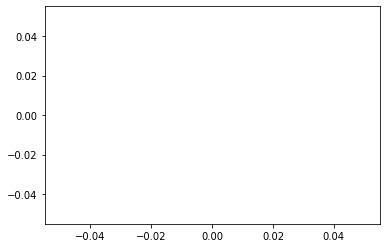

In [47]:
from collections import Counter
w = Counter(rep_l)
plt.bar(w.keys(), w.values())